In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data Exploration

In [57]:
df = pd.read_csv("supermarket_sales.csv")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [58]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [59]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


# Data Processing

In [60]:
df.isna().sum()


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [61]:
def update_rating(rating):
    if rating >= 6:
        return 'A'
    else:
        return 'B'
    

In [62]:
df['Customer Rating'] = df['Rating'].apply(update_rating)
print(df)

      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155  

In [63]:
df["Customer Rating"].value_counts()

A    685
B    315
Name: Customer Rating, dtype: int64

In [64]:
#label Encoding 
from sklearn.preprocessing import LabelEncoder
le ={}
columns_encode = ['Customer type','Gender','Product line','Payment','Customer Rating']
for column in columns_encode:
    le[column] = LabelEncoder()
    df[column] = le[column].fit_transform(df[column])
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Customer Rating
0,750-67-8428,A,Yangon,0,0,3,74.69,7,26.1415,548.9715,1/5/2019,13:08,2,522.83,4.761905,26.1415,9.1,0
1,226-31-3081,C,Naypyitaw,1,0,0,15.28,5,3.8200,80.2200,3/8/2019,10:29,0,76.40,4.761905,3.8200,9.6,0
2,631-41-3108,A,Yangon,1,1,4,46.33,7,16.2155,340.5255,3/3/2019,13:23,1,324.31,4.761905,16.2155,7.4,0
3,123-19-1176,A,Yangon,0,1,3,58.22,8,23.2880,489.0480,1/27/2019,20:33,2,465.76,4.761905,23.2880,8.4,0
4,373-73-7910,A,Yangon,1,1,5,86.31,7,30.2085,634.3785,2/8/2019,10:37,2,604.17,4.761905,30.2085,5.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,1,1,3,40.35,1,2.0175,42.3675,1/29/2019,13:46,2,40.35,4.761905,2.0175,6.2,0
996,303-96-2227,B,Mandalay,1,0,4,97.38,10,48.6900,1022.4900,3/2/2019,17:16,2,973.80,4.761905,48.6900,4.4,1
997,727-02-1313,A,Yangon,0,1,2,31.84,1,1.5920,33.4320,2/9/2019,13:22,0,31.84,4.761905,1.5920,7.7,0
998,347-56-2442,A,Yangon,1,1,4,65.82,1,3.2910,69.1110,2/22/2019,15:33,0,65.82,4.761905,3.2910,4.1,1


In [65]:
x = df.drop(['Invoice ID','Branch','City','Date','Time','Rating','Customer Rating'],axis = 1)
x

,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income
0,0,0,3,74.69,7,26.1415,548.9715,2,522.83,4.761905,26.1415
1,1,0,0,15.28,5,3.8200,80.2200,0,76.40,4.761905,3.8200
2,1,1,4,46.33,7,16.2155,340.5255,1,324.31,4.761905,16.2155
3,0,1,3,58.22,8,23.2880,489.0480,2,465.76,4.761905,23.2880
4,1,1,5,86.31,7,30.2085,634.3785,2,604.17,4.761905,30.2085
...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,3,40.35,1,2.0175,42.3675,2,40.35,4.761905,2.0175
996,1,0,4,97.38,10,48.6900,1022.4900,2,973.80,4.761905,48.6900
997,0,1,2,31.84,1,1.5920,33.4320,0,31.84,4.761905,1.5920
998,1,1,4,65.82,1,3.2910,69.1110,0,65.82,4.761905,3.2910


In [66]:
y = df[["Customer Rating"]]
y

,Customer Rating
0,0
1,0
2,0
3,0
4,1
...,...
995,0
996,1
997,0
998,1


# Split the Data for Testing and Training

In [67]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=0)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)


****************Training Data Shape********************

Training data-X- Shape:	 (800, 11)

Training data-y- Shape:	 (800, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (200, 11)

Testing data(y-Outcome) Shape:	 (200, 1)


In [38]:
xtrain

,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income
687,0,1,4,63.56,10,31.7800,667.3800,0,635.60,4.761905,31.7800
500,0,1,5,73.97,1,3.6985,77.6685,1,73.97,4.761905,3.6985
332,1,1,1,77.02,5,19.2550,404.3550,0,385.10,4.761905,19.2550
979,1,0,2,67.77,1,3.3885,71.1585,1,67.77,4.761905,3.3885
817,1,1,2,33.88,8,13.5520,284.5920,2,271.04,4.761905,13.5520
...,...,...,...,...,...,...,...,...,...,...,...
835,1,1,1,52.38,1,2.6190,54.9990,0,52.38,4.761905,2.6190
192,1,0,2,87.80,9,39.5100,829.7100,0,790.20,4.761905,39.5100
629,1,0,1,12.09,1,0.6045,12.6945,1,12.09,4.761905,0.6045
559,0,0,4,72.42,3,10.8630,228.1230,2,217.26,4.761905,10.8630


In [39]:
xtest

,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income
993,1,1,1,17.49,10,8.7450,183.6450,2,174.90,4.761905,8.7450
859,0,0,2,47.63,9,21.4335,450.1035,0,428.67,4.761905,21.4335
298,0,1,4,60.01,4,12.0020,252.0420,0,240.04,4.761905,12.0020
553,1,1,0,22.21,6,6.6630,139.9230,1,133.26,4.761905,6.6630
672,1,0,3,73.41,3,11.0115,231.2415,2,220.23,4.761905,11.0115
...,...,...,...,...,...,...,...,...,...,...,...
679,0,1,2,48.50,6,14.5500,305.5500,2,291.00,4.761905,14.5500
722,1,1,4,44.12,3,6.6180,138.9780,1,132.36,4.761905,6.6180
215,1,1,4,18.28,1,0.9140,19.1940,1,18.28,4.761905,0.9140
653,0,1,5,37.32,9,16.7940,352.6740,2,335.88,4.761905,16.7940


In [40]:
ytrain

,Customer Rating
687,1
500,1
332,1
979,0
817,0
...,...
835,1
192,0
629,0
559,0


In [41]:
ytest

,Customer Rating
993,0
859,1
298,1
553,0
672,1
...,...
679,0
722,0
215,0
653,1


# Build the Decision Tree model

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
print('*'*75)
print('Decison Tree Model')
print('*'*75)
print('\n Training Phase')
dt_clf.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_clf.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred=dt_clf.predict(xtest)
print('Predicted class labels for the test samples:\n',ypred)
print()
print('Testing completed')
print('='*75)
#import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('*'*100)
print('Decison Tree - Performance Measures')
print('*'*100)
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print('='*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print('='*100)
print('Classification Report\n',classification_report(ytest,ypred))
print('='*100)

***************************************************************************
Decison Tree Model
***************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Completed

 Test Phase
Predicted class labels for the test samples:
 [0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1
 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1
 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0]

Testing completed
************

# Decision Tree with Max Depth

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid={ 'max_depth':[None,3,4,5,6,7,8,10]}
clf=DecisionTreeClassifier(criterion='entropy')
grid_search=GridSearchCV(clf,param_grid,cv=5)
grid_search.fit(xtrain,ytrain)
best_max_depth=grid_search.best_params_['max_depth']
print(best_max_depth)

3


In [52]:
grid_search.best_params_

{'max_depth': 3}

In [53]:
grid_search.cv_results_


{'mean_fit_time': array([0.01527863, 0.007198  , 0.00799441, 0.00999436, 0.00899734,
        0.00979252, 0.0119977 , 0.01119781]),
 'std_fit_time': array([1.08658469e-03, 4.00352961e-04, 8.35622258e-06, 3.01987254e-03,
        2.57050170e-06, 7.40312753e-04, 2.60267592e-03, 4.00544178e-04]),
 'mean_score_time': array([0.00320783, 0.0024024 , 0.0022357 , 0.00240455, 0.00220103,
        0.0030036 , 0.00240459, 0.00260086]),
 'std_score_time': array([0.00075524, 0.00048883, 0.00038736, 0.00049857, 0.00039997,
        0.00109981, 0.00049493, 0.00048945]),
 'param_max_depth': masked_array(data=[None, 3, 4, 5, 6, 7, 8, 10],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': None},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 10}],
 'split0_test_score': array([0.51875, 0.7    , 0.7    , 0.70625, 0.718

[Text(0.48179988348105135, 0.9736842105263158, 'X[10] <= 11.742\ngini = 0.42\nsamples = 800\nvalue = [560, 240]'),
 Text(0.32281479217603914, 0.9210526315789473, 'X[3] <= 75.54\ngini = 0.38\nsamples = 384\nvalue = [286, 98]'),
 Text(0.22264669926650366, 0.868421052631579, 'X[8] <= 97.24\ngini = 0.4\nsamples = 340\nvalue = [246, 94]'),
 Text(0.11415036674816625, 0.8157894736842105, 'X[5] <= 4.699\ngini = 0.46\nsamples = 148\nvalue = [95, 53]'),
 Text(0.08221271393643031, 0.7631578947368421, 'X[8] <= 47.015\ngini = 0.448\nsamples = 142\nvalue = [94, 48]'),
 Text(0.03300733496332518, 0.7105263157894737, 'X[3] <= 12.06\ngini = 0.355\nsamples = 52\nvalue = [40, 12]'),
 Text(0.028117359413202935, 0.6578947368421053, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.037897310513447434, 0.6578947368421053, 'X[3] <= 15.995\ngini = 0.32\nsamples = 50\nvalue = [40, 10]'),
 Text(0.03300733496332518, 0.6052631578947368, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.042787286063569685, 0.6

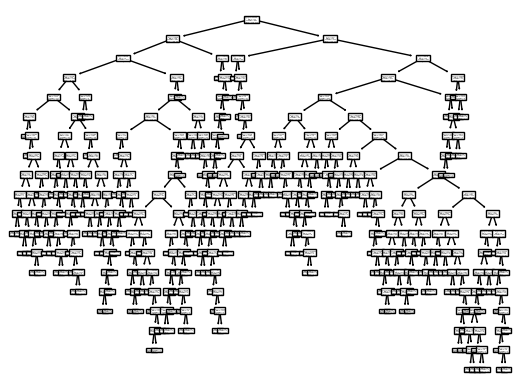

In [55]:
from sklearn import tree
tree.plot_tree(dt_clf)